# Import data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#import seaborn as sns

In [3]:
input_df = pd.read_csv('data/instant_data/water.csv',index_col=['date'],parse_dates=['date'])
input_df_r = pd.read_csv('data/instant_data/rain.csv',index_col=['date'],parse_dates=['date'])

In [4]:
# Select stations

filepath = ("data/hii-telemetering-batch-data-master/")
water_st = pd.read_csv(filepath+"station_metadata-water-level.csv")
water_st = water_st.loc[(water_st['basin']=="แม่น้ำปิง")|(water_st['basin']=="แม่น้ำเจ้าพระยา")|(water_st['basin']=="แม่น้ำน่าน")]

rain_st = pd.read_csv(filepath+'station_metadata-rain.csv')
rain_st = rain_st.loc[(rain_st['basin']=="แม่น้ำปิง")|(rain_st['basin']=="แม่น้ำเจ้าพระยา")|(rain_st['basin']=="แม่น้ำน่าน")]

def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 
col = [i for i in water_st['code']]
#เช็คว่า ชื่อสถานีมีอยู่ในDBจริงก่อนใช้
col = intersection(col,input_df.columns)

col_r = [i for i in rain_st['code']]
col_r = intersection(col_r,input_df_r.columns)

In [5]:
df_w = input_df[col].resample('d').mean()["2015-01-01":"2021-01-01"]
df_w.rename(columns=lambda x: x+'_w', inplace=True)

df_r = input_df_r[col_r]["2015-01-01":"2021-01-01"]
df_r.rename(columns=lambda x: x+'_r', inplace=True)

df = pd.concat([df_w,df_r])
print(df.shape)
df.head()

(4078, 155)


,LBI002_w,CPY006_w,CHM004_w,NAN003_w,PIN002_w,CPY013_w,NAN011_w,PIN004_w,BKK018_w,PIN005_w,...,TBR012_r,BKK013_r,TBR013_r,CPY009_r,CHM005_r,CHM002_r,VLGE19_r,NAN008_r,CPY003_r,TBW008_r
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,1.325662,3.677857,380.033750,NaN,99.541765,0.474186,52.498750,40.585139,0.861389,26.760278,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,1.314559,3.702643,380.039861,NaN,99.569861,0.576121,52.471528,40.612336,0.882361,26.779818,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,1.303383,3.677832,380.036043,NaN,99.547647,0.483761,52.515540,40.563165,0.878542,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,1.294437,3.690208,380.031806,NaN,99.561901,0.428156,52.496181,40.574341,0.864861,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,1.310000,3.701560,380.029441,NaN,99.552222,0.402804,52.465845,40.559639,0.869514,26.716818,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#df = df.interpolate(method='pad', limit=30) # selected period, interporlation missing value
#df.dropna(axis=1,inplace=True) # drop na stations 
print(df.shape)
df.head()


(4078, 155)


,LBI002_w,CPY006_w,CHM004_w,NAN003_w,PIN002_w,CPY013_w,NAN011_w,PIN004_w,BKK018_w,PIN005_w,...,TBR012_r,BKK013_r,TBR013_r,CPY009_r,CHM005_r,CHM002_r,VLGE19_r,NAN008_r,CPY003_r,TBW008_r
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,1.325662,3.677857,380.033750,NaN,99.541765,0.474186,52.498750,40.585139,0.861389,26.760278,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,1.314559,3.702643,380.039861,NaN,99.569861,0.576121,52.471528,40.612336,0.882361,26.779818,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,1.303383,3.677832,380.036043,NaN,99.547647,0.483761,52.515540,40.563165,0.878542,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,1.294437,3.690208,380.031806,NaN,99.561901,0.428156,52.496181,40.574341,0.864861,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,1.310000,3.701560,380.029441,NaN,99.552222,0.402804,52.465845,40.559639,0.869514,26.716818,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# LSTM

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU

from sklearn.preprocessing import MinMaxScaler

In [8]:
# print("********RAIN_BEFORE********")
# print("Min: ", np.min(df))
# print("Max: ", np.max(df))
print("********RAIN_AFTER********")
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])
#y = scaler.fit_transform(y)
print("Min: ", np.min(df))
print("Max: ", np.max(df))

********RAIN_AFTER********
Min:  LBI002_w    0.0
CPY006_w    0.0
CHM004_w    0.0
NAN003_w    0.0
PIN002_w    0.0
           ... 
CHM002_r    0.0
VLGE19_r    0.0
NAN008_r    0.0
CPY003_r    0.0
TBW008_r    0.0
Length: 155, dtype: float64
Max:  LBI002_w    1.0
CPY006_w    1.0
CHM004_w    1.0
NAN003_w    1.0
PIN002_w    1.0
           ... 
CHM002_r    1.0
VLGE19_r    1.0
NAN008_r    1.0
CPY003_r    1.0
TBW008_r    1.0
Length: 155, dtype: float64


In [9]:
timelag = 7
y = df['CPY013_w'].shift(-timelag)

In [10]:
X = df.values[:-timelag]
print(type(X))
print("Shape:",X.shape)
print("*"*20)

y = y.values[:-timelag]
y = y.reshape(-1,1)
print(type(y))
print("Shape:", y.shape)

<class 'numpy.ndarray'>
Shape: (4071, 155)
********************
<class 'numpy.ndarray'>
Shape: (4071, 1)


In [11]:
num_data = len(X)
train_split = 0.8 #8:2 train:test

num_train = int(train_split*num_data)
num_test = num_data-num_train

print("Total data From..",num_data)
print("Train:",num_train,", Test:",num_test)

######################################
x_train = X[0:num_train]
x_test = X[num_train:]

y_train = y[0:num_train]
y_test = y[num_train:]

num_x_feature = X.shape[1]
num_y_feature = y.shape[1]
######################################
print('='*30)
print("x_train shape",x_train.shape)
print("y_train shape",y_train.shape)
print("x feature....",num_x_feature)
print("y feature....",num_y_feature)

Total data From.. 4071
Train: 3256 , Test: 815
x_train shape (3256, 155)
y_train shape (3256, 1)
x feature.... 155
y feature.... 1


In [12]:
def batch_gen(batch_size, sequence_length):
    while True:
        x_shape = (batch_size, sequence_length, num_x_feature)
        x_batch = np.zeros(shape = x_shape, dtype=np.float16)
        
        y_shape = (batch_size, sequence_length, num_y_feature)
        y_batch = np.zeros(shape = y_shape, dtype=np.float16)
        
        #fill batch with random sequences of data
        for i in range(batch_size):
            
            #Get rand start index,
            idx = np.random.randint(num_train - sequence_length)
            
            #copy sequence of data start at this index.
            x_batch[i] = x_train[idx:idx+sequence_length]
            y_batch[i] = y_train[idx:idx+sequence_length]
            
        yield (x_batch, y_batch)       

In [13]:
batch_size = 256
sequence_length = timelag

generator = batch_gen(batch_size=batch_size,
                            sequence_length=sequence_length)

x_batch, y_batch = next(generator)

print(x_batch.shape)
print(y_batch.shape)

(256, 7, 155)
(256, 7, 1)


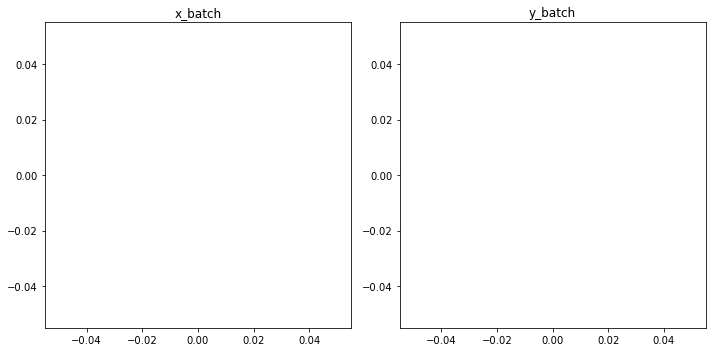

In [14]:
batch = 10  # First sequence in the batch.
signal = 0  # First signal from the 20 input-signals.
seq = x_batch[batch, :, signal]
seq2 = y_batch[batch, :, signal]


fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(seq)
ax[0].set_title("x_batch")
ax[1].plot(seq2)
ax[1].set_title("y_batch")
fig.tight_layout() 


In [15]:
validation_data = (np.expand_dims(x_test, axis=0),np.expand_dims(y_test, axis=0))

print("x_test shape:",validation_data[0].shape)
print("y_test shape:",validation_data[1].shape)

x_test shape: (1, 815, 155)
y_test shape: (1, 815, 1)


In [16]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(None,num_x_feature),
              activation='relu'))
model.add(LSTM(128,return_sequences=True))
model.add(Dense(num_y_feature,activation='relu'))
opt = tf.keras.optimizers.Adam(lr=1e-3,decay=1e-5)

model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 128)         145408    
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 128)         131584    
_________________________________________________________________
dense (Dense)                (None, None, 1)           129       
Total params: 277,121
Trainable params: 277,121
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(x=generator,
          epochs=100,
          steps_per_epoch=100,validation_data=validation_data)

Epoch 1/100
100/100 [==============================] - 11s 106ms/step - loss: nan - accuracy: 3.5714e-04 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/100
100/100 [==============================] - 8s 84ms/step - loss: nan - accuracy: 2.7344e-04 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/100
100/100 [==============================] - 10s 98ms/step - loss: nan - accuracy: 3.1808e-04 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/100
100/100 [==============================] - 8s 81ms/step - loss: nan - accuracy: 2.3437e-04 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/100
100/100 [==============================] - 8s 80ms/step - loss: nan - accuracy: 3.6272e-04 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/100
100/100 [==============================] - 8s 77ms/step - loss: nan - accuracy: 3.0692e-04 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/100
100/100 [==============================] - 8s 84ms/step - loss: nan - accuracy: 3.6830e-04 - val_loss: nan - 

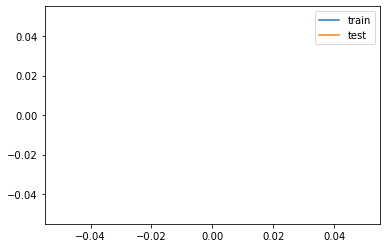

In [18]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

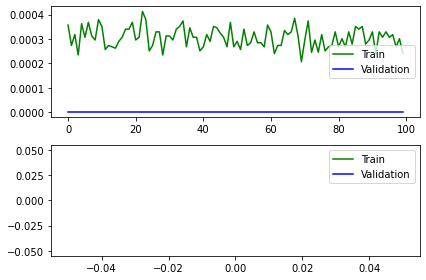

In [23]:
plt.subplot(211)
#
plt.plot(history.history['accuracy'],color="g", label="Train" )
plt.plot(history.history['val_accuracy'],color="b", label="Validation" )
plt.legend(loc='best')

plt.subplot(212)
#
plt.plot(history.history['loss'], color = 'g', label='Train')
plt.plot(history.history['val_loss'], color = 'b', label='Validation')
plt.legend(loc='best')
plt.tight_layout()
plt.show